In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

In [54]:
CLIENT_ID = 'MEEGMHJSOG5BZOFQ124QWLUXSOCWEU2NP2AHNSF2DXCLPKRP' # your Foursquare ID
CLIENT_SECRET = '1R4BA1RDLLMRBQS0D41Q00U0EHG4C3GT5IFWH2HDLSAMUEPM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MEEGMHJSOG5BZOFQ124QWLUXSOCWEU2NP2AHNSF2DXCLPKRP
CLIENT_SECRET:1R4BA1RDLLMRBQS0D41Q00U0EHG4C3GT5IFWH2HDLSAMUEPM


In [55]:
address =  'Lomas de Chapultepec, Ciudad de México, MEXICO'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.4271571 -99.2127913


In [56]:
search_query = 'sushi'
radius = 500
print(search_query + ' .... OK!')

sushi .... OK!


In [57]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=MEEGMHJSOG5BZOFQ124QWLUXSOCWEU2NP2AHNSF2DXCLPKRP&client_secret=1R4BA1RDLLMRBQS0D41Q00U0EHG4C3GT5IFWH2HDLSAMUEPM&ll=19.4271571,-99.2127913&v=20180604&query=sushi&radius=500&limit=30'

In [58]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f38885e1cb0e54c1e394503'},
 'response': {'venues': [{'id': '501ff242f2e74d17624692d0',
    'name': 'Mr. Sushi purplebamboo',
    'location': {'address': 'Prado Norte #343',
     'lat': 19.428025936650172,
     'lng': -99.20923424002123,
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.428025936650172,
       'lng': -99.20923424002123}],
     'distance': 385,
     'postalCode': '11000',
     'cc': 'MX',
     'city': 'Lomas de Chapultepec',
     'state': 'Distrito Federal',
     'country': 'México',
     'formattedAddress': ['Prado Norte #343',
      '11000 Lomas de Chapultepec, Distrito Federal',
      'México']},
    'categories': [{'id': '4bf58dd8d48988d1d2941735',
      'name': 'Sushi Restaurant',
      'pluralName': 'Sushi Restaurants',
      'shortName': 'Sushi',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1597540559',
    'ha

In [59]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,501ff242f2e74d17624692d0,Prado Norte #343,MX,Lomas de Chapultepec,México,NaN,385,"[Prado Norte #343, 11000 Lomas de Chapultepec,...","[{'label': 'display', 'lat': 19.42802593665017...",19.428026,-99.209234,11000,Distrito Federal,Mr. Sushi purplebamboo,v-1597540559
1,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,4b5f59f1f964a5209fb529e3,Av. Paseo de las Palmas,MX,Ciudad de México,México,Col. Lomas de Chapultepec,284,[Av. Paseo de las Palmas (Col. Lomas de Chapul...,"[{'label': 'display', 'lat': 19.42971687714295...",19.429717,-99.212779,NaN,Distrito Federal,Sushi Itto,v-1597540559
2,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,57523e40498e95f30c389b65,Prado norte 470,MX,Ciudad de México,México,NaN,92,"[Prado norte 470, 11010 Ciudad de México, Dist...","[{'label': 'display', 'lat': 19.42719295649928...",19.427193,-99.211910,11010,Distrito Federal,Sushi Pop,v-1597540559
3,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,538ccdad498e71342053fe29,NaN,MX,NaN,México,NaN,156,[México],"[{'label': 'display', 'lat': 19.42746280484836...",19.427463,-99.211337,NaN,NaN,Hattori Sushi (Prado Norte),v-1597540559
4,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,53f3c693498ebcd18c8032d0,NaN,MX,NaN,México,NaN,320,[México],"[{'label': 'display', 'lat': 19.42989958935110...",19.429900,-99.211856,NaN,NaN,Hattori Sushi - Candela,v-1597540559


In [60]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Mr. Sushi purplebamboo,Sushi Restaurant,Prado Norte #343,MX,Lomas de Chapultepec,México,NaN,385,"[Prado Norte #343, 11000 Lomas de Chapultepec,...","[{'label': 'display', 'lat': 19.42802593665017...",19.428026,-99.209234,11000,Distrito Federal,501ff242f2e74d17624692d0
1,Sushi Itto,Sushi Restaurant,Av. Paseo de las Palmas,MX,Ciudad de México,México,Col. Lomas de Chapultepec,284,[Av. Paseo de las Palmas (Col. Lomas de Chapul...,"[{'label': 'display', 'lat': 19.42971687714295...",19.429717,-99.212779,NaN,Distrito Federal,4b5f59f1f964a5209fb529e3
2,Sushi Pop,Sushi Restaurant,Prado norte 470,MX,Ciudad de México,México,NaN,92,"[Prado norte 470, 11010 Ciudad de México, Dist...","[{'label': 'display', 'lat': 19.42719295649928...",19.427193,-99.211910,11010,Distrito Federal,57523e40498e95f30c389b65
3,Hattori Sushi (Prado Norte),Sushi Restaurant,NaN,MX,NaN,México,NaN,156,[México],"[{'label': 'display', 'lat': 19.42746280484836...",19.427463,-99.211337,NaN,NaN,538ccdad498e71342053fe29
4,Hattori Sushi - Candela,Sushi Restaurant,NaN,MX,NaN,México,NaN,320,[México],"[{'label': 'display', 'lat': 19.42989958935110...",19.429900,-99.211856,NaN,NaN,53f3c693498ebcd18c8032d0
5,pai pai (sushi),Food Stand,NaN,MX,NaN,México,NaN,409,[México],"[{'label': 'display', 'lat': 19.430833, 'lng':...",19.430833,-99.212889,NaN,NaN,56be3f3a498ef768f91651ce
6,Sushi King,Sushi Restaurant,Paseo De Las Palmas 260A,MX,Miguel Hidalgi,México,Montes Urales y Arboleda,458,[Paseo De Las Palmas 260A (Montes Urales y Arb...,"[{'label': 'display', 'lat': 19.43046991504650...",19.430470,-99.210201,11000,Distrito Federal,4f47f01ae4b0d6374079945f
7,El Mercado De Prado,Miscellaneous Shop,Prado Norte 465 Lomas de Chapultepec,MX,Ciudad de México,México,Explanada y Barrilaco,46,[Prado Norte 465 Lomas de Chapultepec (Explana...,"[{'label': 'display', 'lat': 19.4270873638387,...",19.427087,-99.212353,11000,Distrito Federal,4cfff550202e224bfdeeb02a
8,Sushitoris,Sushi Restaurant,"Prado Norte 375, Miguel Hidalgo",MX,Ciudad de México,México,NaN,278,"[Prado Norte 375, Miguel Hidalgo, 11000 Ciudad...","[{'label': 'display', 'lat': 19.427653, 'lng':...",19.427653,-99.210193,11000,Distrito Federal,591219926e46500222f99e47


In [79]:
dataframe_filtered.dtypes
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

name                 object
categories           object
address              object
cc                   object
city                 object
country              object
crossStreet          object
distance              int64
formattedAddress     object
labeledLatLngs       object
lat                 float64
lng                 float64
postalCode           object
state                object
id                   object
dtype: object

In [93]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

ValueError: invalid literal for int() with base 10: 'Lomas de Chapultepec'

(0, 2966.995310813814)

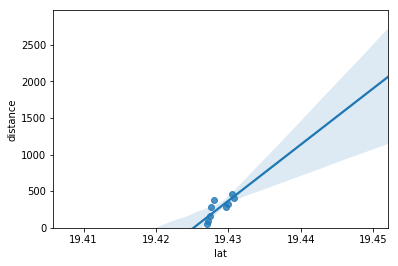

In [62]:
sns.regplot(x="lat", y="distance", data= dataframe_filtered )
plt.ylim(0,)

In [82]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

NameError: name 'venue_id' is not defined

In [68]:
near_2 = '501ff242f2e74d17624692d0' # ID of Mr. Sushi purplebamboo
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    

IndexError: tuple index out of range

In [81]:
near_3 = '57523e40498e95f30c389b65' # ID of SUSHI POP
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

NameError: name 'venue_id' is not defined

In [ ]:
result['response']['venue']['tips']['count']

In [ ]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results